# Cheat sheet for matplotlib

Notes

## Forced custom module load

In [2]:
import sys
sys.path.insert(0, r'my_path')
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import statsmodels

C:\Program Files\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns # for seaborn style
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Normal module load

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns # for seaborn style
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<h2> Line chart </h2>

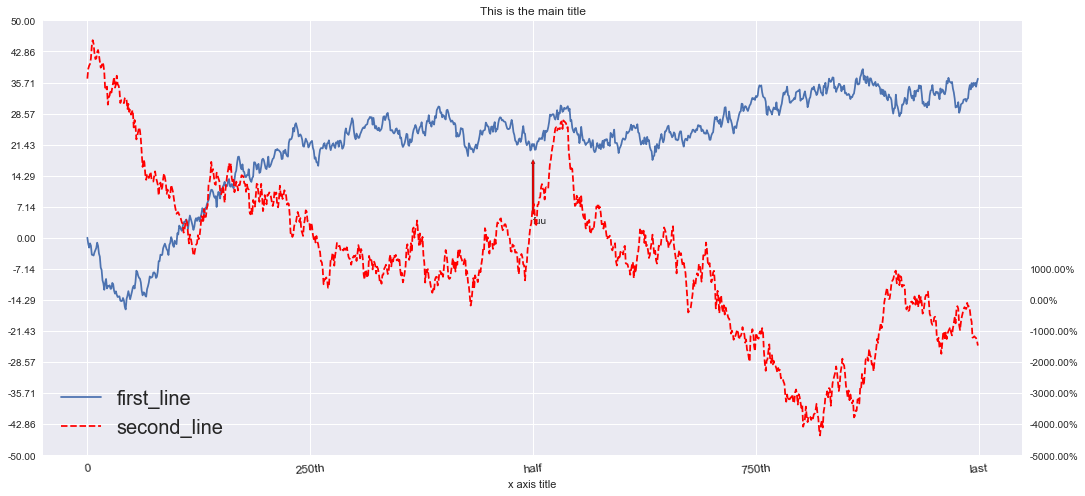

In [4]:
plt.close('all')

# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,1,1)
lns1 = ax1.plot(x,y1, label = 'first_line')

# x axis ticks and labels
# here we set the tick lables from the get-go, we could also acces them
# later by using ax1.get_ticklabels
xticks = ax1.set_xticks([0,250, 500, 750, 1000])
xlabels = ax1.set_xticklabels(['0','250th','half','750th','last'], rotation = 5, fontsize = 'large')
# alternative: xlabels = ax1.set_xticklabels(map(str,xticks))

# Axis limits
ax1.set_xlim(-20,1200)
ax1.set_ylim(-50,50)

# titles
ax1.set_title('This is the main title')
ax1.set_xlabel('x axis title')

# Annotations
ax1.annotate('fuu',xy = (500,18), xytext = (500, 5)
             ,arrowprops = dict(facecolor = 'red',headwidth=4,width=2,headlength=4)
             ,horizontalalignment='left',verticalalignment='top')

# Second line with second y-axis
ax2 = ax1.twinx()
lns2 = ax2.plot(x,y2,'--',color = 'r', label = 'second_line')

# legend 
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc = 3, fontsize = 20)

# Format labels
import matplotlib.ticker as ticker
ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ylabels2 = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in ylabels2])

# Align grid line of two axes and remove ax2 so that it won't cross over lines
import matplotlib.ticker
nticks = 15
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.grid(None)

# Adjusting layout
fig.tight_layout()
plt.subplots_adjust(left= None, bottom = None, right = 0.95, top = None, wspace = None, hspace = None)


<h2>Filled area chart</h2>

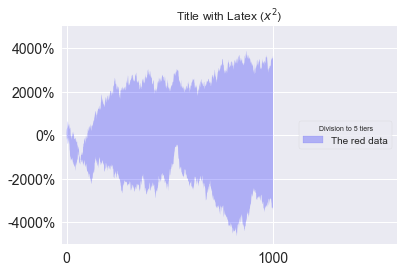

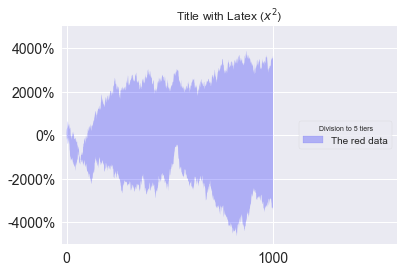

In [5]:
# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1,linewidth = 0)
ax1.plot(x,y2,alpha = 0)

# Fill area between two lines
ax1.fill_between(range(len(y1)), 
                       y1, y2, 
                       facecolor='blue', 
                       alpha=0.25)

# Axis limits
ax1.set_xlim(-20,1600)
ax1.set_ylim(-50,50)

# Control axis tick number
ax1.locator_params(axis='y', nbins=6)
ax1.locator_params(axis='x', nbins=2)

## If the above does not work, try this
#every_nth = 2
#for n, label in enumerate(ax.xaxis.get_ticklabels()):
#    if n % every_nth != 0:
#        label.set_visible(False)

# Tick label size
ax1.tick_params(axis='both', which='major', labelsize=14)

# legend 
red_patch = mpatches.Patch(color='blue', alpha = 0.25, label='The red data')
leg = ax1.legend(handles=[red_patch],loc=7, frameon = True, title='Legend')
leg.set_title("Division to 5 tiers", prop = {'size':'x-small'})

# Format y to percentages
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

ax1.set_title("Title with Latex ($x^2$) ")

fig

<h2> Histograms</h2>
- plt.his() produces half-open, left-inclusive bins. Right-inclusion needs to be hacked by adding a small value

### Histogram where integral sums to 1

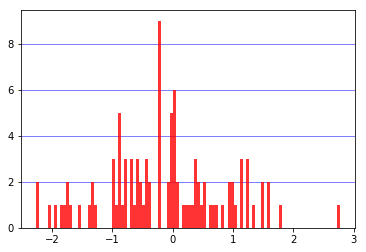

In [14]:
data = np.random.randn(100)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(data,bins=100, color = 'r', alpha=0.8)
# Grid
ax.grid(axis='y',color='blue', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
fig

### Histogram where bar heights sums to 1

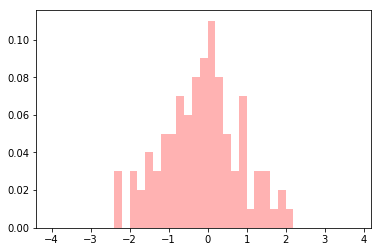

In [7]:
data = np.random.randn(100)
weights = np.ones_like(data)/float(len(data))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# hack for right-inclusion
bins = list(np.arange(-4.0, 4.0, 0.2))
bins = [x + 0.00000001 for x in bins]

ax.hist(data, weights = weights, bins=bins, color = 'r', alpha=0.3)
fig

### Histogram over date counts

,date,val
0,2008-04-10,0
1,2008-04-15,1
2,2008-08-11,2
3,2008-12-12,3


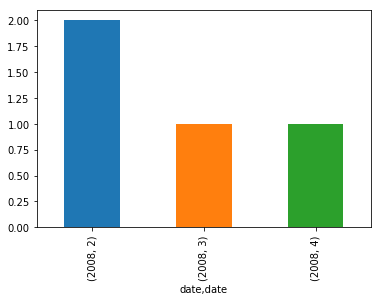

In [8]:
plt.close('all')
df = pd.DataFrame(np.arange(4), [pd.Timestamp('2008-04-10'), pd.Timestamp('2008-04-15'), pd.Timestamp('2008-08-11'), pd.Timestamp('2008-12-12')])
df.reset_index(inplace = True, drop = False)
df.columns = ['date', 'val']
display(df.head())

df["date"].groupby([df["date"].dt.year, df["date"].dt.quarter]).count().plot(kind="bar")
plt.show()

<h2>Figure with multilpe axes</h2>

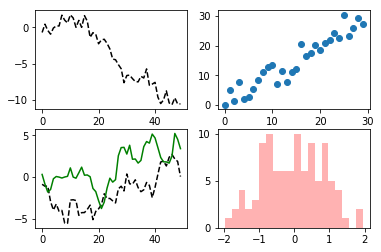

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(np.arange(50), np.random.randn(50).cumsum(), 'k--')
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.arange(50), np.random.randn(50).cumsum(), 'k--',
         np.arange(50), np.random.randn(50).cumsum(), 'g-')
ax4.hist(np.random.randn(100),bins=20, color = 'r',alpha=0.3)

fig

## Bar chart

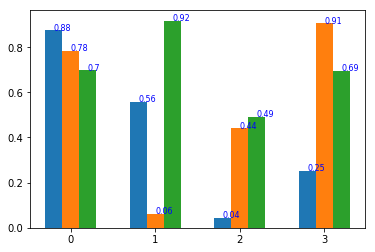

In [10]:
plt.close('all')
df = pd.DataFrame(np.random.rand(4,3), columns = ['ff', 'ee', 'tt'], index = [0,1,2,3])
df

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(df.index - 0.2, df.iloc[:,0], width = 0.2)
ax.bar(df.index, df.iloc[:,1], width = 0.2)
ax.bar(df.index + 0.2, df.iloc[:,2], width = 0.2)
ax.set_xticks(df.index)
ax.set_xticklabels(map(str,df.index))

pos = -0.2
for h in range(2,-1,-1):
    for i, v in enumerate(df.iloc[:,h]):
        ax.text((i - pos) , v , str(round(v,2)), color='blue', fontsize = 8)
    pos += 0.2

fig

<h2>Plotting data frame data</h2>

Genus,A,B,C,D
one,0.498862,0.022126,0.757513,0.864078
two,0.442680,0.311226,0.399199,0.167406
three,0.978170,0.786660,0.174986,0.932018
four,0.972148,0.810967,0.180051,0.782274
five,0.712843,0.372940,0.568141,0.560148
six,0.137543,0.078968,0.484242,0.057411


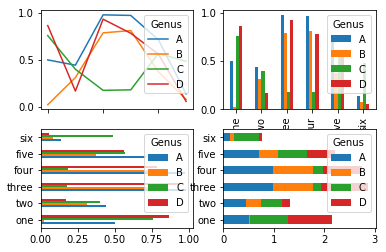

In [11]:
plt.close('all')
df = pd.DataFrame( np.random.rand(6,4)
                  ,index = ['one', 'two','three','four','five','six']
                  ,columns = pd.Index(['A','B','C','D'], name='Genus'))

display(df)
fig, axes = plt.subplots(nrows=2, ncols=2)
df.plot(ax=axes[0,0])
df.plot.bar(ax=axes[0,1])
df.plot.barh(ax=axes[1,0])
df.plot.barh(stacked = True, ax=axes[1,1])
plt.show()

<h2>Chart with plots and text</h2>

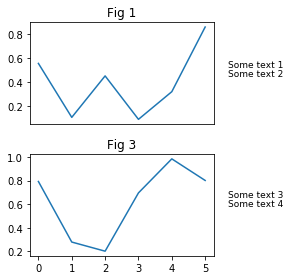

In [12]:
import matplotlib.gridspec as gridspec
df = pd.DataFrame( np.random.rand(6,2)
                  ,columns = pd.Index(['A','B']))
                  
df2 = pd.DataFrame( {'A': ['Some text 1', 'Some text 2']
                     ,'B': ['Some text 3', 'Some text 4']}) 

fig = plt.figure()
gspec = gridspec.GridSpec(2,4)

ax2 = plt.subplot(gspec[1,0:2])
ax2.plot(df.iloc[:,1])
ax2.set_title("Fig 3")

ax1 = plt.subplot(gspec[0,0:2], sharex = ax2)
ax1.plot(df.iloc[:,0])
plt.setp(ax1.get_xticklabels(), visible = False)
ax1.xaxis.set_tick_params(size = 0)
ax1.set_title("Fig 1")

xpos = 0.55
ypos = 0.75
for string in df2['A']:
    fig.text(xpos, ypos, string, fontsize = 9, ha = 'left', wrap=True)
    ypos -= 0.03

ypos = 0.30
for string in df2['B']:
    fig.text(xpos, ypos, string, fontsize = 9, ha = 'left', wrap=True)
    ypos -= 0.03

fig.tight_layout()
fig

<h1>Sample mean bars with colouring depending on confidence</h1>

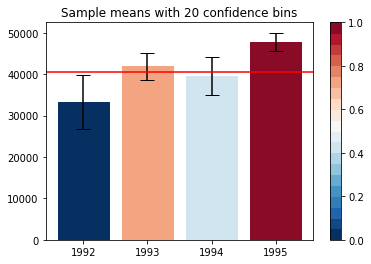

In [13]:
import math
from matplotlib.colors import ListedColormap
import scipy.stats as st
import statsmodels.stats.api as sms

def plot_bars(df, uservalue):
    '''
    df: DataFrame containing data
    uservalue: value for horizontal line
    confint = 1 - confidence level
    '''
    
    confint = 0.95
    quantiles = 20
    
    # Define color map
    nobars = len(df)
    cmap = plt.cm.RdBu
    
    # Discretize color map (and reverse it)
    step = 1.0 / float(quantiles); val = 0; colors = []
    for _ in range(quantiles):
        val = math.floor((val + step) * 100) / 100
        colors.append(cmap(val))
        
    cmap = cmap.from_list('Custom cmap', colors[::-1], quantiles)    
    
    err = []
    tups = []
    for i in range(len(df)):
        a = df.iloc[i,]
        # End-points of conflev confidence intervals
        tup = st.norm.interval(confint, loc = a.mean(), scale = st.sem(a))
        tups.append(tup)
        err.append(a.mean() - tup[0])
    
    # Determine how big of a portion of the confidence interval uservalue covers
    barcolors = [np.nan] * nobars

    for j in range(nobars):
        # If uservalue less than starting point of confidence interval
        if uservalue < tups[j][0]:

            barcolors[j] = colors[0]
            
        # If uservalue equal or greater than ending point of confidence interval            
        elif uservalue >= tups[j][1]:

            barcolors[j] = colors[quantiles-1]        
        else:
            
            pct = (uservalue - tups[j][0]) / (tups[j][1] - tups[j][0])
            barcolors[j] = colors[int(round(pct*20))-1]

    # Figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # Dummy scatter data in order to have color bar
    y = np.array([0, 1])
    scat = ax.scatter(y, y, c = y, cmap = cmap)
    ax.cla() # clear dummy data
    
    # Color bar on cleared dummy data
    plt.colorbar(scat)
    
    # Actual bars
    bars = ax.bar(df.index, df.mean(axis = 1), yerr = err, capsize = 7)
    for h in range(len(bars)):
        bars[h].set_color(barcolors[h])
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index.values.tolist())
    
    # Horizontal line
    ax.axhline(y = uservalue, color = 'red')
    
    ax.set_title('Sample means with ' + str(quantiles) + ' confidence bins')

    return(fig)

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                   index=[1992,1993,1994,1995])

fig = plot_bars(df, 40500)
fig

<h2>Example of multiple subplots</h2>
Figure with multiple subplots, one commonn title and legend

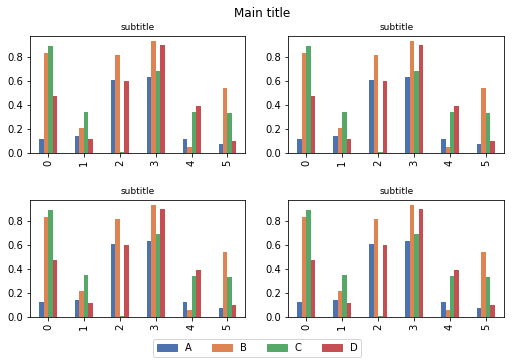

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
plt.close('all')

df = pd.DataFrame( np.random.rand(6,4),columns = ['A','B','C','D'])
df

# Set up figure
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(7, 5)
plt.subplots_adjust(left = 0.04, bottom = 0.12, right = 0.98,
                    top = 0.90, wspace = 0.2, hspace = 0.4)
# Main title
plt.suptitle('Main title')

# Color palette with 4 colors
pal = sns.color_palette('deep',4)
my_cmap = ListedColormap(sns.color_palette(pal).as_hex())

# Legend
handles = []
labels = []
for i in range(4):
    handles.append(mpatches.Patch(color = pal[i]))
    labels.append(df.columns[i])
plt.figlegend(handles , labels, loc = 'lower center', ncol = 4, labelspacing = 0.0 )  

# Subplots
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        df.plot.bar(ax = ax, cmap = my_cmap)
        ax.set_title('subtitle', fontsize = 9)
        ax.legend_.remove()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

fig

# 3D scatter plot

In [23]:
def scatter3D(df,**kwargs):
    """
    Function to plot 3D scatter plot.
    Takes as innput a pandas data frame
    with shape (x, 3).
    
    Notes:
     - requires matplotlib to be imported as
       import matplotlib.pyplot as plt
    
    Versioning
    - 0.1 by Ville Voutilainen
        Initial build
    """
    from mpl_toolkits.mplot3d import Axes3D
    if df.shape[1] != 3:
        raise ValueError('Data frame does not have three columns.')
    
    figsize       = kwargs.get('figsize',(9,5))
    edgecolor     = kwargs.get('edgecolor','k')
    scatter_s     = kwargs.get('scatter_s', 40)
    title         = kwargs.get('title', None)
    xlabel        = kwargs.get('xlabel', df.columns[0])
    ylabel        = kwargs.get('ylabel', df.columns[1])
    zlabel        = kwargs.get('zlabel', df.columns[2])
    azim          = kwargs.get('azim', 0)
    elev          = kwargs.get('elev', 20)
    xlim = kwargs.get('xlim',None)
    ylim = kwargs.get('ylim',None)
    zlim = kwargs.get('zlim',None)    
    return_plot   = kwargs.get('return_plot', True)    

    ###################################
    # Core plot
    ###################################        
    fig = plt.figure(figsize=figsize)        
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], 
               edgecolor = edgecolor, s=scatter_s)    
    ax.view_init(azim = azim, elev = elev)
    
    ###################################
    # Stylings
    ###################################
    if title is not None:
        ax.set_title(title)    
    if xlabel != 'none':
        ax.set_xlabel(xlabel)
    if ylabel != 'none':
        ax.set_ylabel(ylabel)
    if zlabel != 'none':
        ax.set_zlabel(zlabel)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if zlim != None:
        ax.set_zlim(zlim)
        
    ###################################
    # Return
    ###################################    
    if return_plot == True:
        return fig, ax

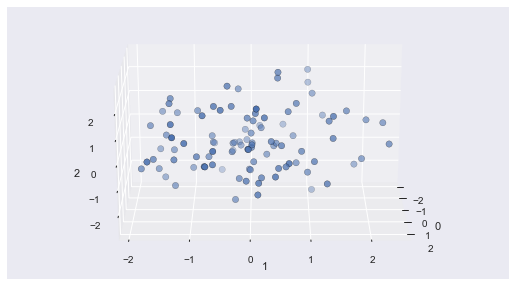

In [24]:
df = pd.DataFrame(np.random.randn(100,3))
scatter3D(df, return_plot = False)